In [7]:
import os
import numpy as np
import tensorflow as tf
from keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt
import cv2
# from google.colab.patches import cv2_imshow      alter native 'cv2.imshow'

Gamma Correction

In [5]:
def apply_clahe_to_image(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Create a CLAHE object
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

    # Convert the image to LAB color space
    lab_img = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab_img)

    # Apply CLAHE to the L channel
    cla = clahe.apply(l)

    # Merge the CLAHE-enhanced L channel back with the original A and B channels
    clahe_img = cv2.merge((cla, a, b))

    # Convert the LAB image back to BGR color space
    clahe_img = cv2.cvtColor(clahe_img, cv2.COLOR_LAB2BGR)

    return clahe_img

def apply_gamma_correction(image_path, gamma=1.0):
    # Read the image
    image = cv2.imread(image_path)

    # Apply gamma correction
    gamma_corrected = np.power(image / 255.0, gamma) * 255.0
    gamma_corrected = gamma_corrected.astype(np.uint8)

    return gamma_corrected

# List of input and output folders for 5 classes
classes = ['Cauliflower_Healthy', 'Cauliflower_Healthy_Leaf', 'Cauliflower_Leaf_Black_Rot', 'Cauliflower_Leaf_Red_Spot', 'Cauliflower_Spot_Rot']

for class_name in classes:
    # Input folder for each class
    image_folder = f'/home/sourov/Defense Projects/Aman Defense/Cauliflower_Disease_Project/train/{class_name}'

    # Output folder for Gamma Correction for each class
    gamma_output_folder = f'/home/sourov/Defense Projects/Aman Defense/Cauliflower_Disease_Project/gamma_correction/{class_name}'

    # Output folder for Gamma Correction for each class
    # gamma_output_folder = f'/content/drive/MyDrive/Academic/Medicinal Leaf/Pre-processed data/Gamma_Correction/{class_name}'

    # Ensure the output folders exist
    # os.makedirs(clahe_output_folder, exist_ok=True)
    os.makedirs(gamma_output_folder, exist_ok=True)

    # Process each image in the folder and save the results (CLAHE and Gamma Correction)
    for file_name in os.listdir(image_folder):
        # Construct the full path for each image
        image_path = os.path.join(image_folder, file_name)

        # Check if the item in the folder is a file
        if os.path.isfile(image_path):
            # Process the image using CLAHE
            clahe_processed_image = apply_clahe_to_image(image_path)

            # Process the image using Gamma Correction
            gamma_processed_image = apply_gamma_correction(image_path, gamma=1.5)  # You can adjust the gamma value

            # Construct the output file paths
            gamma_output_path = os.path.join(gamma_output_folder, file_name)

            # Save the processed images
            cv2.imwrite(gamma_output_path, gamma_processed_image)

KeyboardInterrupt: 

In [ ]:
# # Original image path
# original_image_path = "/home/sourov/Defense Projects/Aman Defense/Cauliflower_Disease_Project/train/Cauliflower_Healthy_Leaf/Cf_healthy_l-1-_jpg.rf.d7a60a3569995af035ecf3047ac3c737_0.jpg"

# # Processed image path
# processed_image_path = "/home/sourov/Defense Projects/Aman Defense/Cauliflower_Disease_Project/gamma_correction/Cauliflower_Healthy_Leaf/Cf_healthy_l-1-_jpg.rf.d7a60a3569995af035ecf3047ac3c737_0.jpg"

# # Read the original and processed images
# original_image = cv2.imread(original_image_path)
# processed_image = cv2.imread(processed_image_path)

# # Display the original and processed images side by side
# stacked_image = np.hstack((original_image, processed_image))
# cv2.imshow("Original and Processed Images", stacked_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/sourov/Defense Projects/Aman Defense/Cauliflower_Disease_Project/myenv/lib/python3.10/site-packages/cv2/qt/plugins"


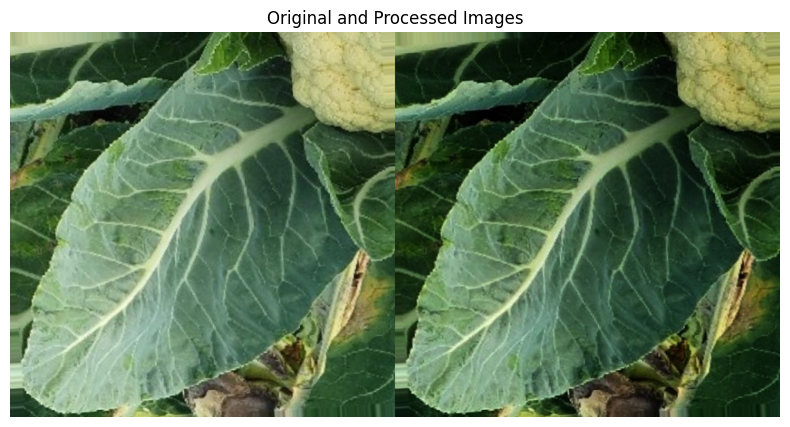

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Original image path
original_image_path = "/home/sourov/Defense Projects/Aman Defense/Cauliflower_Disease_Project/train/Cauliflower_Healthy_Leaf/Cf_healthy_l-1-_jpg.rf.d7a60a3569995af035ecf3047ac3c737_0.jpg"

# Processed image path
processed_image_path = "/home/sourov/Defense Projects/Aman Defense/Cauliflower_Disease_Project/gamma_correction/Cauliflower_Healthy_Leaf/Cf_healthy_l-1-_jpg.rf.d7a60a3569995af035ecf3047ac3c737_0.jpg"

# Read the original and processed images
original_image = cv2.imread(original_image_path)
processed_image = cv2.imread(processed_image_path)

# Check if the images were successfully loaded
if original_image is None:
    print(f"Error: Could not load original image from {original_image_path}")
elif processed_image is None:
    print(f"Error: Could not load processed image from {processed_image_path}")
else:
    # Convert images from BGR (OpenCV format) to RGB (matplotlib format)
    original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    processed_image_rgb = cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB)
    
    # Display the original and processed images side by side
    stacked_image = np.hstack((original_image_rgb, processed_image_rgb))
    
    # Plotting the stacked image
    plt.figure(figsize=(10, 5))
    plt.imshow(stacked_image)
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.title('Original and Processed Images')
    plt.show()


Gaussian Filter

In [ ]:
# Function to apply Gaussian filter to an image
def apply_gaussian_filter(image, kernel_size=(3, 3)):
    filtered_image = cv2.GaussianBlur(image, kernel_size, 0)  # 0 is the standard deviation
    return filtered_image

# List of input and output folders for 5 classes
classes = ['Cauliflower_Healthy', 'Cauliflower_Healthy_Leaf', 'Cauliflower_Leaf_Black_Rot', 'Cauliflower_Leaf_Red_Spot', 'Cauliflower_Spot_Rot']

for class_name in classes:
    # Input folder for each class
    gamma_output_folder = f'/home/sourov/Defense Projects/Aman Defense/Cauliflower_Disease_Project/gamma_correction/{class_name}'

    # Output folder for Gaussian Noise and Filtering for each class
    gaussian_output_folder = f'/home/sourov/Defense Projects/Aman Defense/Cauliflower_Disease_Project/gaussian_filter/{class_name}'

    # Ensure the output folder exists
    os.makedirs(gaussian_output_folder, exist_ok=True)

    # Process each image in the folder and save the results (Gaussian Noise and Filtering)
    for file_name in os.listdir(gamma_output_folder):
        # Construct the full path for each image after gamma correction
        gamma_processed_path = os.path.join(gamma_output_folder, file_name)

        # Check if the item in the folder is a file
        if os.path.isfile(gamma_processed_path):
            # Read the gamma-corrected image
            gamma_processed_image = cv2.imread(gamma_processed_path)

            # Apply Gaussian filter to the noisy image
            filtered_image = apply_gaussian_filter(gamma_processed_image)

            # Construct the output file path
            gaussian_output_path = os.path.join(gaussian_output_folder, file_name)

            # Save the processed image
            cv2.imwrite(gaussian_output_path, filtered_image)

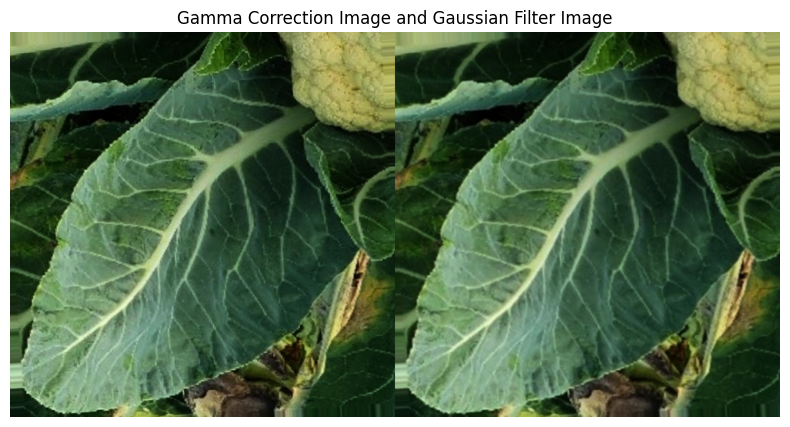

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Original image path
original_image_path = "/home/sourov/Defense Projects/Aman Defense/Cauliflower_Disease_Project/gamma_correction/Cauliflower_Healthy_Leaf/Cf_healthy_l-1-_jpg.rf.d7a60a3569995af035ecf3047ac3c737_0.jpg"

# Processed image path
processed_image_path = "/home/sourov/Defense Projects/Aman Defense/Cauliflower_Disease_Project/gaussian_filter/Cauliflower_Healthy_Leaf/Cf_healthy_l-1-_jpg.rf.d7a60a3569995af035ecf3047ac3c737_0.jpg"

# Read the original and processed images
original_image = cv2.imread(original_image_path)
processed_image = cv2.imread(processed_image_path)

# Check if the images were successfully loaded
if original_image is None:
    print(f"Error: Could not load original image from {original_image_path}")
elif processed_image is None:
    print(f"Error: Could not load processed image from {processed_image_path}")
else:
    # Convert images from BGR (OpenCV format) to RGB (matplotlib format)
    original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    processed_image_rgb = cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB)
    
    # Display the original and processed images side by side
    stacked_image = np.hstack((original_image_rgb, processed_image_rgb))
    
    # Plotting the stacked image
    plt.figure(figsize=(10, 5))
    plt.imshow(stacked_image)
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.title('Gamma Correction Image and Gaussian Filter Image')
    plt.show()

Histogram Equalization

In [9]:
def apply_clahe_to_image(image_path_histogram):
    # Read the image
    image_histogram = cv2.imread(image_path_histogram)

    # Create a CLAHE object
    clahe_histogram = cv2.createCLAHE(clipLimit=1.3, tileGridSize=(8, 8))

    # Convert the image to LAB color space
    lab_img_histogram = cv2.cvtColor(image_histogram, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab_img_histogram)

    # Apply CLAHE to the L channel
    clahe_histogram = clahe_histogram.apply(l)

    # Merge the CLAHE-enhanced L channel back with the original A and B channels
    clahe_img_histogram = cv2.merge((clahe_histogram, a, b))

    # Convert the LAB image back to BGR color space
    clahe_img_histogram = cv2.cvtColor(clahe_img_histogram, cv2.COLOR_LAB2BGR)

    return clahe_img_histogram

# List of input and output folders for 5 classes
classes = ['Cauliflower_Healthy', 'Cauliflower_Healthy_Leaf', 'Cauliflower_Leaf_Black_Rot', 'Cauliflower_Leaf_Red_Spot', 'Cauliflower_Spot_Rot']

for class_name in classes:
    # Input folder for each class
    gaussian_folder = f'/home/sourov/Defense Projects/Aman Defense/Cauliflower_Disease_Project/gaussian_filter/{class_name}'

    # Output folder for each class
    histogram_equalization_folder = f'/home/sourov/Defense Projects/Aman Defense/Cauliflower_Disease_Project/histogram_equalization/{class_name}'

    # Ensure the output folder exists
    os.makedirs(histogram_equalization_folder, exist_ok=True)

    # Process each image in the folder and save the results
    for file_name in os.listdir(gaussian_folder):
        # Construct the full path for each image
        image_path_histogram = os.path.join(gaussian_folder, file_name)

        # Check if the item in the folder is a file
        if os.path.isfile(image_path_histogram):
            # Process the image
            processed_image_hitogram = apply_clahe_to_image(image_path_histogram)

            # Construct the output file path
            output_path_histogram = os.path.join(histogram_equalization_folder, file_name)

            # Save the processed image
            cv2.imwrite(output_path_histogram, processed_image_hitogram)

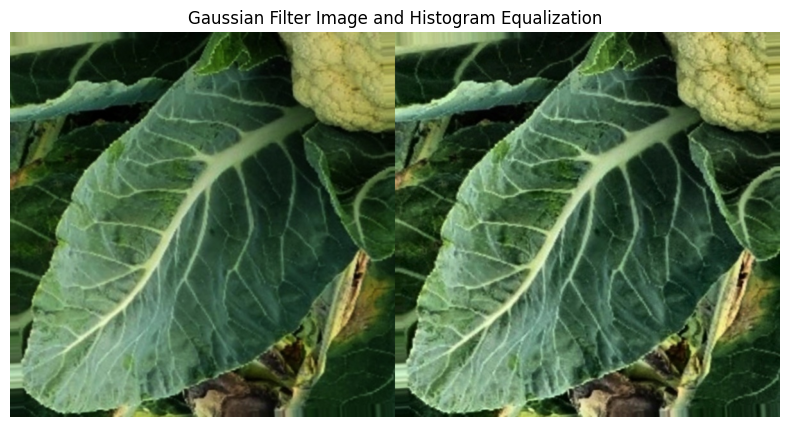

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Original image path
original_image_path = "/home/sourov/Defense Projects/Aman Defense/Cauliflower_Disease_Project/gaussian_filter/Cauliflower_Healthy_Leaf/Cf_healthy_l-1-_jpg.rf.d7a60a3569995af035ecf3047ac3c737_0.jpg"

# Processed image path
processed_image_path = "/home/sourov/Defense Projects/Aman Defense/Cauliflower_Disease_Project/histogram_equalization/Cauliflower_Healthy_Leaf/Cf_healthy_l-1-_jpg.rf.d7a60a3569995af035ecf3047ac3c737_0.jpg"

# Read the original and processed images
original_image = cv2.imread(original_image_path)
processed_image = cv2.imread(processed_image_path)

# Check if the images were successfully loaded
if original_image is None:
    print(f"Error: Could not load original image from {original_image_path}")
elif processed_image is None:
    print(f"Error: Could not load processed image from {processed_image_path}")
else:
    # Convert images from BGR (OpenCV format) to RGB (matplotlib format)
    original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    processed_image_rgb = cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB)
    
    # Display the original and processed images side by side
    stacked_image = np.hstack((original_image_rgb, processed_image_rgb))
    
    # Plotting the stacked image
    plt.figure(figsize=(10, 5))
    plt.imshow(stacked_image)
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.title('Gaussian Filter Image and Histogram Equalization')
    plt.show()

Count Images Number

In [13]:
import os

def count_images_in_folder(folder_path, extensions=['.jpg', '.jpeg', '.png']):
    """
    Count the number of images in a folder.
    
    Args:
    - folder_path (str): Path to the folder containing images.
    - extensions (list): List of image file extensions to consider. Default is ['.jpg', '.jpeg', '.png'].
    
    Returns:
    - count (int): Number of images in the folder.
    """
    count = 0
    for file_name in os.listdir(folder_path):
        if os.path.isfile(os.path.join(folder_path, file_name)) and file_name.lower().endswith(tuple(extensions)):
            count += 1
    return count
Total_Count = 0
classes = ['Cauliflower_Healthy', 'Cauliflower_Healthy_Leaf', 'Cauliflower_Leaf_Black_Rot', 'Cauliflower_Leaf_Red_Spot', 'Cauliflower_Spot_Rot']
for class_name in classes:
    folder_path = f"/home/sourov/Defense Projects/Aman Defense/Cauliflower_Disease_Project/gaussian_filter/{class_name}"
    image_count = count_images_in_folder(folder_path)
    print(f"Number of in class {class_name} is : ", image_count)
    Total_Count+=image_count
print(f"Total number of images: {Total_Count}")

Number of in class Cauliflower_Healthy is :  1680
Number of in class Cauliflower_Healthy_Leaf is :  1248
Number of in class Cauliflower_Leaf_Black_Rot is :  1488
Number of in class Cauliflower_Leaf_Red_Spot is :  1488
Number of in class Cauliflower_Spot_Rot is :  1488
Total number of images: 7392


Augmentation

In [11]:
# Define the ImageDataGenerator with desired augmentations
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [15]:

# Define the folder path containing main images
Cauliflower_Healthy_path = '/home/sourov/Defense Projects/Aman Defense/Cauliflower_Disease_Project/valid/Cauliflower_Healthy'
Cauliflower_Healthy_Leaf_path = '/home/sourov/Defense Projects/Aman Defense/Cauliflower_Disease_Project/valid/Cauliflower_Healthy_Leaf'
Cauliflower_Leaf_Black_Rot_path = '/home/sourov/Defense Projects/Aman Defense/Cauliflower_Disease_Project/valid/Cauliflower_Leaf_Black_Rot'
Cauliflower_Leaf_Red_Spot_path = '/home/sourov/Defense Projects/Aman Defense/Cauliflower_Disease_Project/valid/Cauliflower_Leaf_Red_Spot'
Cauliflower_Spot_Rot_path = '/home/sourov/Defense Projects/Aman Defense/Cauliflower_Disease_Project/valid/Cauliflower_Spot_Rot'


# Create a directory to save the augmented images
Cauliflower_Healthy_output_folder_path = '/home/sourov/Defense Projects/Aman Defense/Cauliflower_Disease_Project/augmented_image/Cauliflower_Healthy'
os.makedirs(Cauliflower_Healthy_output_folder_path, exist_ok=True)

Cauliflower_Healthy_Leaf_output_folder_path = '/home/sourov/Defense Projects/Aman Defense/Cauliflower_Disease_Project/augmented_image/Cauliflower_Healthy_Leaf'
os.makedirs(Cauliflower_Healthy_Leaf_output_folder_path, exist_ok=True)

Cauliflower_Leaf_Black_Rot_output_folder_path = '/home/sourov/Defense Projects/Aman Defense/Cauliflower_Disease_Project/augmented_image/Cauliflower_Leaf_Black_Rot'
os.makedirs(Cauliflower_Leaf_Black_Rot_output_folder_path, exist_ok=True)

Cauliflower_Leaf_Red_Spot_output_folder_path = '/home/sourov/Defense Projects/Aman Defense/Cauliflower_Disease_Project/augmented_image/Cauliflower_Leaf_Red_Spot'
os.makedirs(Cauliflower_Leaf_Red_Spot_output_folder_path, exist_ok=True)

Cauliflower_Spot_Rot_output_folder_path = '/home/sourov/Defense Projects/Aman Defense/Cauliflower_Disease_Project/augmented_image/Cauliflower_Spot_Rot'
os.makedirs(Cauliflower_Spot_Rot_output_folder_path, exist_ok=True)


# List all the images filenames in the folder
Cauliflower_Healthy_image_filenames = os.listdir(Cauliflower_Healthy_path)
Cauliflower_Healthy_Leaf_image_filenames = os.listdir(Cauliflower_Healthy_Leaf_path)
Cauliflower_Leaf_Black_Rot_image_filenames = os.listdir(Cauliflower_Leaf_Black_Rot_path)
Cauliflower_Leaf_Red_Spot_image_filenames = os.listdir(Cauliflower_Leaf_Red_Spot_path)
Cauliflower_Spot_Rot_image_filenames = os.listdir(Cauliflower_Spot_Rot_path)

# Loop through each image in the folder and apply augmentation
for file_index in range(len(Cauliflower_Leaf_Black_Rot_image_filenames)):
  # Augmentation for amloki images
  if Cauliflower_Healthy_image_filenames[file_index].endswith(('.jpg', '.jpeg', '.png', '.bmp')):
    amloki_img_path = os.path.join(Cauliflower_Healthy_path, Cauliflower_Healthy_image_filenames[file_index])
    img = load_img(amloki_img_path, target_size=(150, 150))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)

    # Generate augmented images
    i = 0
    for batch in datagen.flow(x, batch_size=1):
      amloki_augmented_img = array_to_img(batch[0])
      # Save the augmented image
      output_filename = f"augmented_{Cauliflower_Healthy_image_filenames[file_index]}_{i}.jpg"
      output_path = os.path.join(Cauliflower_Healthy_output_folder_path, output_filename)
      amloki_augmented_img.save(output_path)

      i += 1
      if i >= 5:  # number of augmented versions as needed
          break


  # Arjuna image augmentation
  if Cauliflower_Healthy_Leaf_image_filenames[file_index].endswith(('.jpg', '.jpeg', '.png', '.bmp')):
    arjuna_img_path = os.path.join(Cauliflower_Healthy_Leaf_path, Cauliflower_Healthy_Leaf_image_filenames[file_index])
    img = load_img(arjuna_img_path, target_size=(150, 150))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)

    # Generate augmented images
    i = 0
    for batch in datagen.flow(x, batch_size=1):
      arjuna_augmented_img = array_to_img(batch[0])
      # Save the augmented image
      output_filename = f"augmented_{Cauliflower_Healthy_Leaf_image_filenames[file_index]}_{i}.jpg"
      output_path = os.path.join(Cauliflower_Healthy_Leaf_output_folder_path, output_filename)
      arjuna_augmented_img.save(output_path)

      i += 1
      if i >= 5:  # number of augmented versions as needed
          break


  # Thankuni image augmentation
  if Cauliflower_Leaf_Black_Rot_image_filenames[file_index].endswith(('.jpg', '.jpeg', '.png', '.bmp')):
    thankuni_img_path = os.path.join(Cauliflower_Leaf_Black_Rot_path, Cauliflower_Leaf_Black_Rot_image_filenames[file_index])
    img = load_img(thankuni_img_path, target_size=(150, 150))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)

    # Generate augmented images
    i = 0
    for batch in datagen.flow(x, batch_size=1):
      thankuni_augmented_img = array_to_img(batch[0])
      # Save the augmented image
      output_filename = f"augmented_{Cauliflower_Leaf_Black_Rot_image_filenames[file_index]}_{i}.jpg"
      output_path = os.path.join(Cauliflower_Leaf_Black_Rot_output_folder_path, output_filename)
      thankuni_augmented_img.save(output_path)

      i += 1
      if i >= 5:  # number of augmented versions as needed
          break


  # neem image augmentation
  if Cauliflower_Leaf_Red_Spot_image_filenames[file_index].endswith(('.jpg', '.jpeg', '.png', '.bmp')):
    neem_img_path = os.path.join(Cauliflower_Leaf_Red_Spot_path, Cauliflower_Leaf_Red_Spot_image_filenames[file_index])
    img = load_img(neem_img_path, target_size=(150, 150))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)

    # Generate augmented images
    i = 0
    for batch in datagen.flow(x, batch_size=1):
      neem_augmented_img = array_to_img(batch[0])
      # Save the augmented image
      output_filename = f"augmented_{Cauliflower_Leaf_Red_Spot_image_filenames[file_index]}_{i}.jpg"
      output_path = os.path.join(Cauliflower_Leaf_Red_Spot_output_folder_path, output_filename)
      neem_augmented_img.save(output_path)

      i += 1
      if i >= 5:  # number of augmented versions as needed
          break

  # tulsi image augmentation
  if Cauliflower_Spot_Rot_image_filenames[file_index].endswith(('.jpg', '.jpeg', '.png', '.bmp')):
    tulsi_img_path = os.path.join(Cauliflower_Spot_Rot_path, Cauliflower_Spot_Rot_image_filenames[file_index])
    img = load_img(tulsi_img_path, target_size=(150, 150))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)

    # Generate augmented images
    i = 0
    for batch in datagen.flow(x, batch_size=1):
      tulsi_augmented_img = array_to_img(batch[0])
      # Save the augmented image
      output_filename = f"augmented_{Cauliflower_Spot_Rot_image_filenames[file_index]}_{i}.jpg"
      output_path = os.path.join(Cauliflower_Spot_Rot_output_folder_path, output_filename)
      tulsi_augmented_img.save(output_path)

      i += 1
      if i >= 5:  # number of augmented versions as needed
          break


Cauliflower_Healthy_image_aug_files = os.listdir(Cauliflower_Healthy_output_folder_path)
print("Cauliflower_Healthy image count : ", len(Cauliflower_Healthy_image_aug_files))

Cauliflower_Healthy_Leaf_image_aug_files = os.listdir(Cauliflower_Healthy_Leaf_output_folder_path)
print("Cauliflower_Healthy_Leaf image count : ", len(Cauliflower_Healthy_Leaf_image_aug_files))

Cauliflower_Leaf_Black_Rot_image_aug_files = os.listdir(Cauliflower_Leaf_Black_Rot_output_folder_path)
print("Cauliflower_Leaf_Black_Rot image count : ", len(Cauliflower_Leaf_Black_Rot_image_aug_files))

Cauliflower_Leaf_Red_Spot_image_aug_files = os.listdir(Cauliflower_Leaf_Red_Spot_output_folder_path)
print("Cauliflower_Leaf_Red_Spot image count : ", len(Cauliflower_Leaf_Red_Spot_image_aug_files))

Cauliflower_Spot_Rot_image_aug_files = os.listdir(Cauliflower_Spot_Rot_output_folder_path)
print("Cauliflower_Spot_Rot image count : ", len(Cauliflower_Spot_Rot_image_aug_files))



Cauliflower_Healthy image count :  1865
Cauliflower_Healthy_Leaf image count :  1865
Cauliflower_Leaf_Black_Rot image count :  1860
Cauliflower_Leaf_Red_Spot image count :  1860
Cauliflower_Spot_Rot image count :  1860


In [16]:

# Define the folder path containing main images
Cauliflower_Healthy_path = '/home/sourov/Defense Projects/Aman Defense/Cauliflower_Disease_Project/valid/Cauliflower_Healthy'
Cauliflower_Healthy_Leaf_path = '/home/sourov/Defense Projects/Aman Defense/Cauliflower_Disease_Project/valid/Cauliflower_Healthy_Leaf'
Cauliflower_Leaf_Black_Rot_path = '/home/sourov/Defense Projects/Aman Defense/Cauliflower_Disease_Project/valid/Cauliflower_Leaf_Black_Rot'
Cauliflower_Leaf_Red_Spot_path = '/home/sourov/Defense Projects/Aman Defense/Cauliflower_Disease_Project/valid/Cauliflower_Leaf_Red_Spot'
Cauliflower_Spot_Rot_path = '/home/sourov/Defense Projects/Aman Defense/Cauliflower_Disease_Project/valid/Cauliflower_Spot_Rot'


# Create a directory to save the augmented images
Cauliflower_Healthy_output_folder_path = '/home/sourov/Defense Projects/Aman Defense/Cauliflower_Disease_Project/augmented_image/Cauliflower_Healthy'
os.makedirs(Cauliflower_Healthy_output_folder_path, exist_ok=True)

Cauliflower_Healthy_Leaf_output_folder_path = '/home/sourov/Defense Projects/Aman Defense/Cauliflower_Disease_Project/augmented_image/Cauliflower_Healthy_Leaf'
os.makedirs(Cauliflower_Healthy_Leaf_output_folder_path, exist_ok=True)

Cauliflower_Leaf_Black_Rot_output_folder_path = '/home/sourov/Defense Projects/Aman Defense/Cauliflower_Disease_Project/augmented_image/Cauliflower_Leaf_Black_Rot'
os.makedirs(Cauliflower_Leaf_Black_Rot_output_folder_path, exist_ok=True)

Cauliflower_Leaf_Red_Spot_output_folder_path = '/home/sourov/Defense Projects/Aman Defense/Cauliflower_Disease_Project/augmented_image/Cauliflower_Leaf_Red_Spot'
os.makedirs(Cauliflower_Leaf_Red_Spot_output_folder_path, exist_ok=True)

Cauliflower_Spot_Rot_output_folder_path = '/home/sourov/Defense Projects/Aman Defense/Cauliflower_Disease_Project/augmented_image/Cauliflower_Spot_Rot'
os.makedirs(Cauliflower_Spot_Rot_output_folder_path, exist_ok=True)


# List all the images filenames in the folder
Cauliflower_Healthy_image_filenames = os.listdir(Cauliflower_Healthy_path)
Cauliflower_Healthy_Leaf_image_filenames = os.listdir(Cauliflower_Healthy_Leaf_path)
Cauliflower_Leaf_Black_Rot_image_filenames = os.listdir(Cauliflower_Leaf_Black_Rot_path)
Cauliflower_Leaf_Red_Spot_image_filenames = os.listdir(Cauliflower_Leaf_Red_Spot_path)
Cauliflower_Spot_Rot_image_filenames = os.listdir(Cauliflower_Spot_Rot_path)

# Loop through each image in the folder and apply augmentation
for file_index in range(len(Cauliflower_Healthy_image_filenames)):
  # Augmentation for amloki images
  if Cauliflower_Healthy_image_filenames[file_index].endswith(('.jpg', '.jpeg', '.png', '.bmp')):
    amloki_img_path = os.path.join(Cauliflower_Healthy_path, Cauliflower_Healthy_image_filenames[file_index])
    img = load_img(amloki_img_path, target_size=(150, 150))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)

    # Generate augmented images
    i = 0
    for batch in datagen.flow(x, batch_size=1):
      amloki_augmented_img = array_to_img(batch[0])
      # Save the augmented image
      output_filename = f"augmented_{Cauliflower_Healthy_image_filenames[file_index]}_{i}.jpg"
      output_path = os.path.join(Cauliflower_Healthy_output_folder_path, output_filename)
      amloki_augmented_img.save(output_path)

      i += 1
      if i >= 6:  # number of augmented versions as needed
          break


  # Arjuna image augmentation
for file_index in range(len(Cauliflower_Healthy_Leaf_image_filenames)):
  if Cauliflower_Healthy_Leaf_image_filenames[file_index].endswith(('.jpg', '.jpeg', '.png', '.bmp')):
    arjuna_img_path = os.path.join(Cauliflower_Healthy_Leaf_path, Cauliflower_Healthy_Leaf_image_filenames[file_index])
    img = load_img(arjuna_img_path, target_size=(150, 150))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)

    # Generate augmented images
    i = 0
    for batch in datagen.flow(x, batch_size=1):
      arjuna_augmented_img = array_to_img(batch[0])
      # Save the augmented image
      output_filename = f"augmented_{Cauliflower_Healthy_Leaf_image_filenames[file_index]}_{i}.jpg"
      output_path = os.path.join(Cauliflower_Healthy_Leaf_output_folder_path, output_filename)
      arjuna_augmented_img.save(output_path)

      i += 1
      if i >= 5:  # number of augmented versions as needed
          break


  # Thankuni image augmentation
for file_index in range(len(Cauliflower_Leaf_Black_Rot_image_filenames)):
  if Cauliflower_Leaf_Black_Rot_image_filenames[file_index].endswith(('.jpg', '.jpeg', '.png', '.bmp')):
    thankuni_img_path = os.path.join(Cauliflower_Leaf_Black_Rot_path, Cauliflower_Leaf_Black_Rot_image_filenames[file_index])
    img = load_img(thankuni_img_path, target_size=(150, 150))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)

    # Generate augmented images
    i = 0
    for batch in datagen.flow(x, batch_size=1):
      thankuni_augmented_img = array_to_img(batch[0])
      # Save the augmented image
      output_filename = f"augmented_{Cauliflower_Leaf_Black_Rot_image_filenames[file_index]}_{i}.jpg"
      output_path = os.path.join(Cauliflower_Leaf_Black_Rot_output_folder_path, output_filename)
      thankuni_augmented_img.save(output_path)

      i += 1
      if i >= 6:  # number of augmented versions as needed
          break


  # neem image augmentation
for file_index in range(len(Cauliflower_Leaf_Red_Spot_image_filenames)):
  if Cauliflower_Leaf_Red_Spot_image_filenames[file_index].endswith(('.jpg', '.jpeg', '.png', '.bmp')):
    neem_img_path = os.path.join(Cauliflower_Leaf_Red_Spot_path, Cauliflower_Leaf_Red_Spot_image_filenames[file_index])
    img = load_img(neem_img_path, target_size=(150, 150))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)

    # Generate augmented images
    i = 0
    for batch in datagen.flow(x, batch_size=1):
      neem_augmented_img = array_to_img(batch[0])
      # Save the augmented image
      output_filename = f"augmented_{Cauliflower_Leaf_Red_Spot_image_filenames[file_index]}_{i}.jpg"
      output_path = os.path.join(Cauliflower_Leaf_Red_Spot_output_folder_path, output_filename)
      neem_augmented_img.save(output_path)

      i += 1
      if i >= 6:  # number of augmented versions as needed
          break

  # tulsi image augmentation
for file_index in range(len(Cauliflower_Spot_Rot_image_filenames)):
  if Cauliflower_Spot_Rot_image_filenames[file_index].endswith(('.jpg', '.jpeg', '.png', '.bmp')):
    tulsi_img_path = os.path.join(Cauliflower_Spot_Rot_path, Cauliflower_Spot_Rot_image_filenames[file_index])
    img = load_img(tulsi_img_path, target_size=(150, 150))
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)

    # Generate augmented images
    i = 0
    for batch in datagen.flow(x, batch_size=1):
      tulsi_augmented_img = array_to_img(batch[0])
      # Save the augmented image
      output_filename = f"augmented_{Cauliflower_Spot_Rot_image_filenames[file_index]}_{i}.jpg"
      output_path = os.path.join(Cauliflower_Spot_Rot_output_folder_path, output_filename)
      tulsi_augmented_img.save(output_path)

      i += 1
      if i >= 6:  # number of augmented versions as needed
          break


Cauliflower_Healthy_image_aug_files = os.listdir(Cauliflower_Healthy_output_folder_path)
print("Cauliflower_Healthy image count : ", len(Cauliflower_Healthy_image_aug_files))

Cauliflower_Healthy_Leaf_image_aug_files = os.listdir(Cauliflower_Healthy_Leaf_output_folder_path)
print("Cauliflower_Healthy_Leaf image count : ", len(Cauliflower_Healthy_Leaf_image_aug_files))

Cauliflower_Leaf_Black_Rot_image_aug_files = os.listdir(Cauliflower_Leaf_Black_Rot_output_folder_path)
print("Cauliflower_Leaf_Black_Rot image count : ", len(Cauliflower_Leaf_Black_Rot_image_aug_files))

Cauliflower_Leaf_Red_Spot_image_aug_files = os.listdir(Cauliflower_Leaf_Red_Spot_output_folder_path)
print("Cauliflower_Leaf_Red_Spot image count : ", len(Cauliflower_Leaf_Red_Spot_image_aug_files))

Cauliflower_Spot_Rot_image_aug_files = os.listdir(Cauliflower_Spot_Rot_output_folder_path)
print("Cauliflower_Spot_Rot image count : ", len(Cauliflower_Spot_Rot_image_aug_files))

Cauliflower_Healthy image count :  2520
Cauliflower_Healthy_Leaf image count :  3120
Cauliflower_Leaf_Black_Rot image count :  2232
Cauliflower_Leaf_Red_Spot image count :  2232
Cauliflower_Spot_Rot image count :  2232


In [13]:
import os

def count_images_in_folder(folder_path, extensions=['.jpg', '.jpeg', '.png']):
    """
    Count the number of images in a folder.
    
    Args:
    - folder_path (str): Path to the folder containing images.
    - extensions (list): List of image file extensions to consider. Default is ['.jpg', '.jpeg', '.png'].
    
    Returns:
    - count (int): Number of images in the folder.
    """
    count = 0
    for file_name in os.listdir(folder_path):
        if os.path.isfile(os.path.join(folder_path, file_name)) and file_name.lower().endswith(tuple(extensions)):
            count += 1
    return count
Total_Count = 0
classes = ['Cauliflower_Healthy', 'Cauliflower_Healthy_Leaf', 'Cauliflower_Leaf_Black_Rot', 'Cauliflower_Leaf_Red_Spot', 'Cauliflower_Spot_Rot']
for class_name in classes:
    folder_path = f"/home/sourov/Defense Projects/Aman Defense/Cauliflower_Disease_Project/valid/{class_name}"
    image_count = count_images_in_folder(folder_path)
    print(f"Number of in class {class_name} is : ", image_count)
    Total_Count+=image_count
print(f"Total number of images: {Total_Count}")

Number of in class Cauliflower_Healthy is :  420
Number of in class Cauliflower_Healthy_Leaf is :  624
Number of in class Cauliflower_Leaf_Black_Rot is :  372
Number of in class Cauliflower_Leaf_Red_Spot is :  372
Number of in class Cauliflower_Spot_Rot is :  372
Total number of images: 2160
